In [4]:
from dotenv import load_dotenv
import os

load_dotenv("../.env")   # from notebooks/ folder

True

In [21]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 23.8 MB/s  0:00:00m0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data_path = "../data/air_quality_health_ses_merged_clean.csv"
df = pd.read_csv(data_path)

df.head(), df.shape


(           county_name  state_fips  county_fips  year  annual_pm25  full_fips  \
 0  Maricopa County, AZ           4           13  2018     8.617241       4013   
 1  Maricopa County, AZ           4           13  2019     6.882506       4013   
 2  Maricopa County, AZ           4           13  2020     9.086345       4013   
 3  Maricopa County, AZ           4           13  2021     8.559276       4013   
 4  Maricopa County, AZ           4           13  2022     8.340768       4013   
 
    asthma_prevalence  median_household_income  poverty_percent  
 0                NaN                    61606             10.6  
 1                NaN                    64468              9.9  
 2                NaN                    67799              9.1  
 3                NaN                    72944              8.5  
 4                NaN                    80675              8.1  ,
 (24, 9))

## Basic Data Diagnostics

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county_name              24 non-null     object 
 1   state_fips               24 non-null     int64  
 2   county_fips              24 non-null     int64  
 3   year                     24 non-null     int64  
 4   annual_pm25              24 non-null     float64
 5   full_fips                24 non-null     int64  
 6   asthma_prevalence        4 non-null      float64
 7   median_household_income  24 non-null     int64  
 8   poverty_percent          24 non-null     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.8+ KB


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county_name              24 non-null     object 
 1   state_fips               24 non-null     int64  
 2   county_fips              24 non-null     int64  
 3   year                     24 non-null     int64  
 4   annual_pm25              24 non-null     float64
 5   full_fips                24 non-null     int64  
 6   asthma_prevalence        4 non-null      float64
 7   median_household_income  24 non-null     int64  
 8   poverty_percent          24 non-null     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.8+ KB


In [10]:
df.isna().sum()


county_name                 0
state_fips                  0
county_fips                 0
year                        0
annual_pm25                 0
full_fips                   0
asthma_prevalence          20
median_household_income     0
poverty_percent             0
dtype: int64

## PM2.5 Trend Analysis (2018–2023)

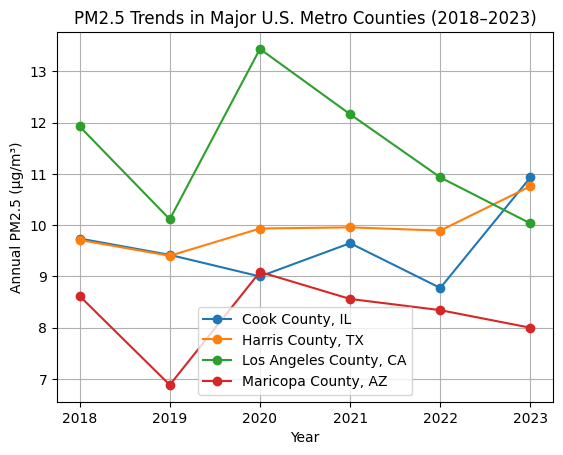

In [11]:
plt.figure()
for name, grp in df.groupby("county_name"):
    plt.plot(grp["year"], grp["annual_pm25"], marker="o", label=name)

plt.xlabel("Year")
plt.ylabel("Annual PM2.5 (µg/m³)")
plt.title("PM2.5 Trends in Major U.S. Metro Counties (2018–2023)")
plt.legend()
plt.grid(True)
plt.show()


## Income & Poverty Trends Over Time

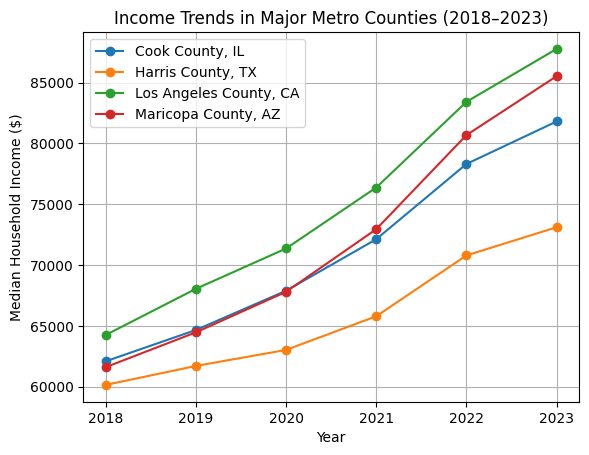

In [12]:
fig, ax1 = plt.subplots()

for name, grp in df.groupby("county_name"):
    ax1.plot(grp["year"], grp["median_household_income"], marker="o", label=name)

ax1.set_xlabel("Year")
ax1.set_ylabel("Median Household Income ($)")
ax1.set_title("Income Trends in Major Metro Counties (2018–2023)")
ax1.legend()
ax1.grid(True)
plt.show()


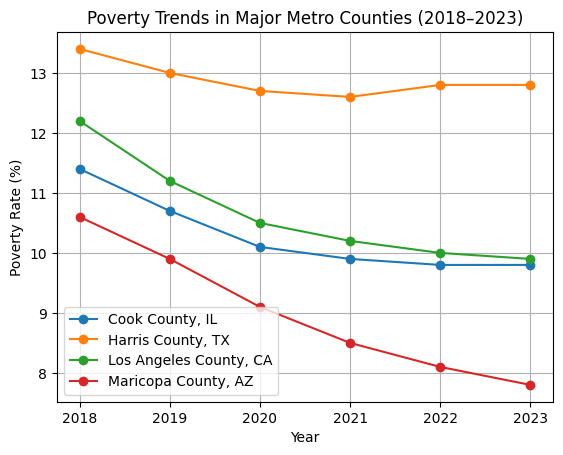

In [13]:
fig, ax2 = plt.subplots()

for name, grp in df.groupby("county_name"):
    ax2.plot(grp["year"], grp["poverty_percent"], marker="o", label=name)

ax2.set_xlabel("Year")
ax2.set_ylabel("Poverty Rate (%)")
ax2.set_title("Poverty Trends in Major Metro Counties (2018–2023)")
ax2.legend()
ax2.grid(True)
plt.show()


## 2023 Cross-Sectional Asthma Analysis (Core Health Result)

In [14]:
df_2023 = df[df["year"] == 2023].dropna(subset=["asthma_prevalence"])
df_2023


,county_name,state_fips,county_fips,year,annual_pm25,full_fips,asthma_prevalence,median_household_income,poverty_percent
5,"Maricopa County, AZ",4,13,2023,7.997694,4013,10.1,85518,7.8
11,"Los Angeles County, CA",6,37,2023,10.031451,6037,9.1,87760,9.9
17,"Cook County, IL",17,31,2023,10.932002,17031,9.8,81797,9.8
23,"Harris County, TX",48,201,2023,10.758265,48201,9.2,73104,12.8


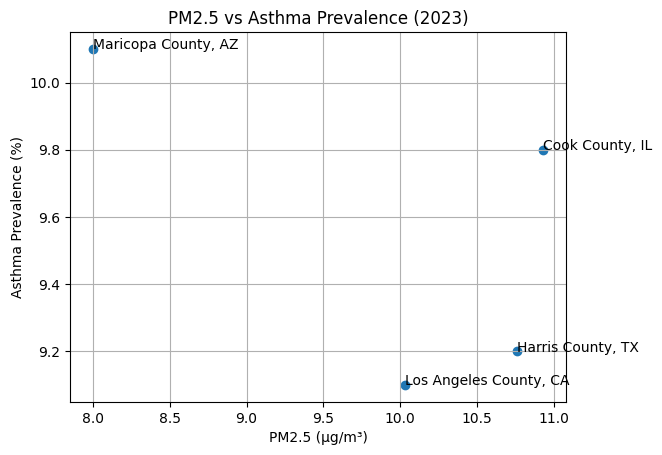

In [15]:
plt.figure()
plt.scatter(df_2023["annual_pm25"], df_2023["asthma_prevalence"])

for i, txt in enumerate(df_2023["county_name"]):
    plt.annotate(txt, (df_2023["annual_pm25"].iloc[i], 
                        df_2023["asthma_prevalence"].iloc[i]))

plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Asthma Prevalence (%)")
plt.title("PM2.5 vs Asthma Prevalence (2023)")
plt.grid(True)
plt.show()


## PM2.5 vs Poverty (Environmental Inequality)

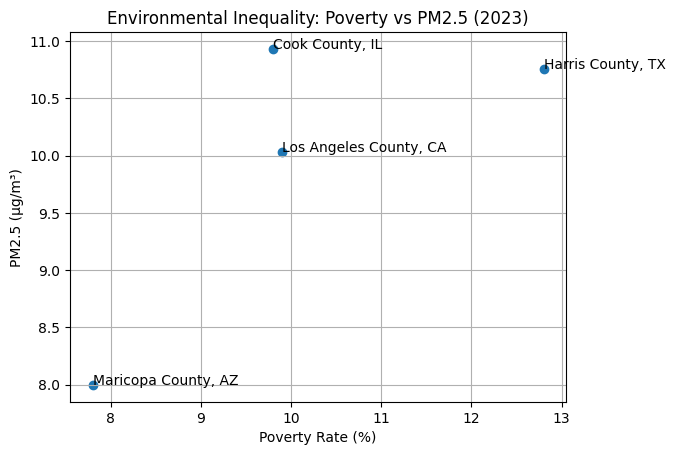

In [16]:
plt.figure()
plt.scatter(df_2023["poverty_percent"], df_2023["annual_pm25"])

for i, txt in enumerate(df_2023["county_name"]):
    plt.annotate(txt, (df_2023["poverty_percent"].iloc[i], 
                        df_2023["annual_pm25"].iloc[i]))

plt.xlabel("Poverty Rate (%)")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Environmental Inequality: Poverty vs PM2.5 (2023)")
plt.grid(True)
plt.show()


## Correlation Matrix

In [17]:
corr_vars = df_2023[[
    "annual_pm25", 
    "asthma_prevalence",
    "median_household_income",
    "poverty_percent"
]]

corr_vars.corr()


,annual_pm25,asthma_prevalence,median_household_income,poverty_percent
annual_pm25,1.000000,-0.592764,-0.529501,0.765319
asthma_prevalence,-0.592764,1.000000,0.259327,-0.741276
median_household_income,-0.529501,0.259327,1.000000,-0.833860
poverty_percent,0.765319,-0.741276,-0.833860,1.000000


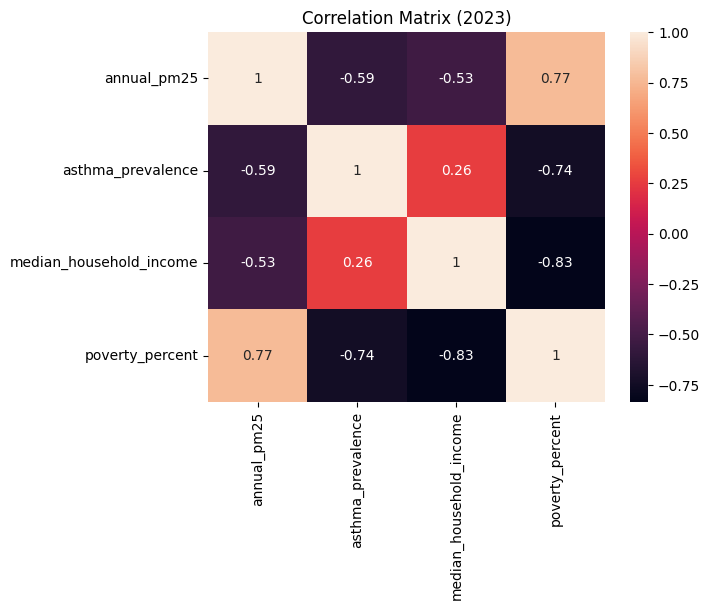

In [19]:
sns.heatmap(corr_vars.corr(), annot=True)
plt.title("Correlation Matrix (2023)")
plt.show()


## Simple Policy-Grade Regression (Asthma ~ PM2.5 + Poverty)

In [22]:
import statsmodels.api as sm

X = df_2023[["annual_pm25", "poverty_percent"]]
X = sm.add_constant(X)
y = df_2023["asthma_prevalence"]

model = sm.OLS(y, X).fit()
model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      asthma_prevalence   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                 -0.347
Method:                 Least Squares   F-statistic:                    0.6137
Date:                Wed, 10 Dec 2025   Prob (F-statistic):              0.670
Time:                        03:44:56   Log-Likelihood:               -0.55933
No. Observations:                   4   AIC:                             7.119
Df Residuals:                       1   BIC:                             5.278
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3973      2.416      4.717      0.133     -19.306      42.100
annual_pm25        -0.0219      0.371     -0.059      0.962      -4.735       4.691
poverty_percent    -0.1618      0.243     -0.667      0.626      -3.244       2.920
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.867
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.849
Skew:                          -1.069   Prob(JB):                        0.654
Kurtosis:                       2.275   Cond. No.                         125.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import os

# Ensure visuals directory exists
os.makedirs("../visuals", exist_ok=True)

# =========================
# 1️⃣ PM2.5 TRENDS OVER TIME
# =========================
plt.figure()
for name, grp in df.groupby("county_name"):
    plt.plot(grp["year"], grp["annual_pm25"], marker="o", label=name)

plt.xlabel("Year")
plt.ylabel("Annual PM2.5 (µg/m³)")
plt.title("PM2.5 Trends in Major U.S. Metro Counties (2018–2023)")
plt.legend()
plt.grid(True)
plt.savefig("../visuals/pm25_trends_2018_2023.png", dpi=300)
plt.close()

# =========================
# 2️⃣ INCOME TRENDS
# =========================
plt.figure()
for name, grp in df.groupby("county_name"):
    plt.plot(grp["year"], grp["median_household_income"], marker="o", label=name)

plt.xlabel("Year")
plt.ylabel("Median Household Income ($)")
plt.title("Income Trends in Major Metro Counties (2018–2023)")
plt.legend()
plt.grid(True)
plt.savefig("../visuals/income_trends_2018_2023.png", dpi=300)
plt.close()

# =========================
# 3️⃣ POVERTY TRENDS
# =========================
plt.figure()
for name, grp in df.groupby("county_name"):
    plt.plot(grp["year"], grp["poverty_percent"], marker="o", label=name)

plt.xlabel("Year")
plt.ylabel("Poverty Rate (%)")
plt.title("Poverty Trends in Major Metro Counties (2018–2023)")
plt.legend()
plt.grid(True)
plt.savefig("../visuals/poverty_trends_2018_2023.png", dpi=300)
plt.close()

# =========================
# 4️⃣ PM2.5 VS ASTHMA (2023)
# =========================
plt.figure()
plt.scatter(df_2023["annual_pm25"], df_2023["asthma_prevalence"])

for i, txt in enumerate(df_2023["county_name"]):
    plt.annotate(txt, (
        df_2023["annual_pm25"].iloc[i], 
        df_2023["asthma_prevalence"].iloc[i]
    ))

plt.xlabel("PM2.5 (µg/m³)")
plt.ylabel("Asthma Prevalence (%)")
plt.title("PM2.5 vs Asthma Prevalence (2023)")
plt.grid(True)
plt.savefig("../visuals/pm25_vs_asthma_2023.png", dpi=300)
plt.close()

# =========================
# 5️⃣ POVERTY VS PM2.5 (2023)
# =========================
plt.figure()
plt.scatter(df_2023["poverty_percent"], df_2023["annual_pm25"])

for i, txt in enumerate(df_2023["county_name"]):
    plt.annotate(txt, (
        df_2023["poverty_percent"].iloc[i], 
        df_2023["annual_pm25"].iloc[i]
    ))

plt.xlabel("Poverty Rate (%)")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Environmental Inequality: Poverty vs PM2.5 (2023)")
plt.grid(True)
plt.savefig("../visuals/poverty_vs_pm25_2023.png", dpi=300)
plt.close()

print("✅ All figures successfully saved to the /visuals folder at 300 DPI")


✅ All figures successfully saved to the /visuals folder at 300 DPI
